## Homework: 04-evaluation

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.


In this homework, we will use the Bank Marketing dataset. Download it from [here](https://archive.ics.uci.edu/static/public/222/bank+marketing.zip).

You can do it with `wget`:

```bash
wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
unzip bank+marketing.zip 
unzip bank.zip
```

We need `bank-full.csv`.

In this dataset the target variable is `y` variable - has the client subscribed a term deposit or not. 

### Dataset preparation

For the rest of the homework, you'll need to use only these columns:

* `'age'`,
* `'job'`,
* `'marital'`,
* `'education'`,
* `'balance'`,
* `'housing'`,
* `'contact'`,
* `'day'`,
* `'month'`,
* `'duration'`,
* `'campaign'`,
* `'pdays'`,
* `'previous'`,
* `'poutcome'`,
* `'y'`

Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` function for that with `random_state=1`

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Data loading
data = 'https://archive.ics.uci.edu/static/public/222/bank+marketing.zip'

In [3]:
!wget $data -O bank+marketing.zip

--2024-10-18 20:10:27--  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank+marketing.zip’

bank+marketing.zip      [  <=>               ] 999.85K  4.52MB/s    in 0.2s    

2024-10-18 20:10:28 (4.52 MB/s) - ‘bank+marketing.zip’ saved [1023843]



In [4]:
!unzip bank+marketing.zip
!unzip bank.zip

Archive:  bank+marketing.zip
 extracting: bank.zip                
 extracting: bank-additional.zip     
Archive:  bank.zip
  inflating: bank-full.csv           
  inflating: bank-names.txt          
  inflating: bank.csv                


In [5]:
! head bank-full.csv

"age";"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"
58;"management";"married";"tertiary";"no";2143;"yes";"no";"unknown";5;"may";261;1;-1;0;"unknown";"no"
44;"technician";"single";"secondary";"no";29;"yes";"no";"unknown";5;"may";151;1;-1;0;"unknown";"no"
33;"entrepreneur";"married";"secondary";"no";2;"yes";"yes";"unknown";5;"may";76;1;-1;0;"unknown";"no"
47;"blue-collar";"married";"unknown";"no";1506;"yes";"no";"unknown";5;"may";92;1;-1;0;"unknown";"no"
33;"unknown";"single";"unknown";"no";1;"no";"no";"unknown";5;"may";198;1;-1;0;"unknown";"no"
35;"management";"married";"tertiary";"no";231;"yes";"no";"unknown";5;"may";139;1;-1;0;"unknown";"no"
28;"management";"single";"tertiary";"no";447;"yes";"yes";"unknown";5;"may";217;1;-1;0;"unknown";"no"
42;"entrepreneur";"divorced";"tertiary";"yes";2;"yes";"no";"unknown";5;"may";380;1;-1;0;"unknown";"no"
58;"retired";"married";"primary";"no";121;"yes

In [6]:
cols = [
    'age',
    'job',
    'marital',
    'education',
    'balance',
    'housing',
    'contact',
    'day',
    'month',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'poutcome',
    'y'
]

In [7]:
df = pd.read_csv('bank-full.csv', sep=';', usecols=cols)
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
df.shape

(45211, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   contact    45211 non-null  object
 7   day        45211 non-null  int64 
 8   month      45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.2+ MB


In [10]:
df.describe().round(2)

,age,balance,day,duration,campaign,pdays,previous
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,1362.27,15.81,258.16,2.76,40.20,0.58
std,10.62,3044.77,8.32,257.53,3.10,100.13,2.30
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,1428.00,21.00,319.00,3.00,-1.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,871.00,275.00


In [11]:
# check for missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [12]:
df.y = (df.y == 'yes').astype(int)
df.y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [15]:
len(df_train), len(df_val), len(df_test)

(27126, 9042, 9043)

In [16]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [17]:
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

del df_train['y']
del df_val['y']
del df_test['y']

In [18]:
df_train.shape

(27126, 14)

In [19]:
df_train.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome
0,56,entrepreneur,married,tertiary,40,no,cellular,11,jul,123,2,-1,0,unknown
1,33,technician,married,secondary,4790,yes,cellular,20,apr,137,1,272,2,failure
2,32,technician,single,tertiary,392,yes,cellular,21,nov,148,2,-1,0,unknown
3,40,admin.,divorced,secondary,2129,no,cellular,30,apr,452,1,-1,0,unknown
4,54,unemployed,married,tertiary,1180,no,cellular,19,nov,394,2,-1,0,unknown


In [20]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

### Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

* For each numerical variable, use it as score (aka prediction) and compute the AUC with the `y` variable as ground truth.
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['engine_hp']`)

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- `balance`
- `day`
- `duration`
- `previous`

**Answer: `duration`**

In [21]:
numerical = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

In [22]:
from sklearn.metrics import roc_auc_score

In [23]:
# calculate roc_auc_score for 1 num feature
roc_auc_score(y_train, df_train['age'])

np.float64(0.48781428247265596)

In [24]:
def calculate_auc(feature):
    auc = roc_auc_score(y_train, df_train[feature])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[feature])
    return auc

In [25]:
for var in numerical:
    auc_score = calculate_auc(var)
    print(var, auc_score)

age 0.512185717527344
balance 0.5888313805382317
day 0.525957882383908
duration 0.8147002759670778
campaign 0.5714543015682159
pdays 0.5901276247352144
previous 0.5985653242764153


In [26]:
# Calculate AUC scores for all variables
auc_scores = {}
for var in numerical:
    auc_scores[var] = calculate_auc(var)

# Sort the scores in descending order
sorted_scores = sorted(auc_scores.items(), key=lambda x: x[1], reverse=True)

# Print the scores in descending order
for var, score in sorted_scores:
    print(f"{var}: {score:.4f}")

duration: 0.8147
previous: 0.5986
pdays: 0.5901
balance: 0.5888
campaign: 0.5715
day: 0.5260
age: 0.5122


### Question 2: Training the model

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```python
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.69
- 0.79
- 0.89
- 0.99

**Answer: `0.69`**

In [27]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [28]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [29]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [30]:
y_pred = model.predict(X_val)

In [31]:
y_val.shape, y_pred.shape

((9042,), (9042,))

In [32]:
round(roc_auc_score(y_val, y_pred), 3)

np.float64(0.658)

### Question 3: Precision and Recall

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

* 0.265
* 0.465
* 0.665
* 0.865

**Answer: `0.465`**

In [33]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [34]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [35]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [36]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[7752,  192],
       [ 725,  373]])

In [37]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.86, 0.02],
       [0.08, 0.04]])

In [38]:
# precision
p = tp / (tp + fp)
p

np.float64(0.6601769911504425)

In [39]:
# recall
r = tp / (tp + fn)
r

np.float64(0.33970856102003644)

In [40]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [41]:
scores[:2]

[(np.float64(0.0), np.int64(1098), np.int64(7944), np.int64(0), np.int64(0)),
 (np.float64(0.01),
  np.int64(373),
  np.int64(192),
  np.int64(725),
  np.int64(7752))]

In [42]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)

In [43]:
df_scores.head()

,threshold,tp,fp,fn,tn,precision,recall
0,0.00,1098,7944,0,0,0.121433,1.000000
1,0.01,373,192,725,7752,0.660177,0.339709
2,0.02,373,192,725,7752,0.660177,0.339709
3,0.03,373,192,725,7752,0.660177,0.339709
4,0.04,373,192,725,7752,0.660177,0.339709


In [44]:
thresholds = df_scores['threshold'].values
precision = df_scores['precision'].values
recall = df_scores['recall'].values

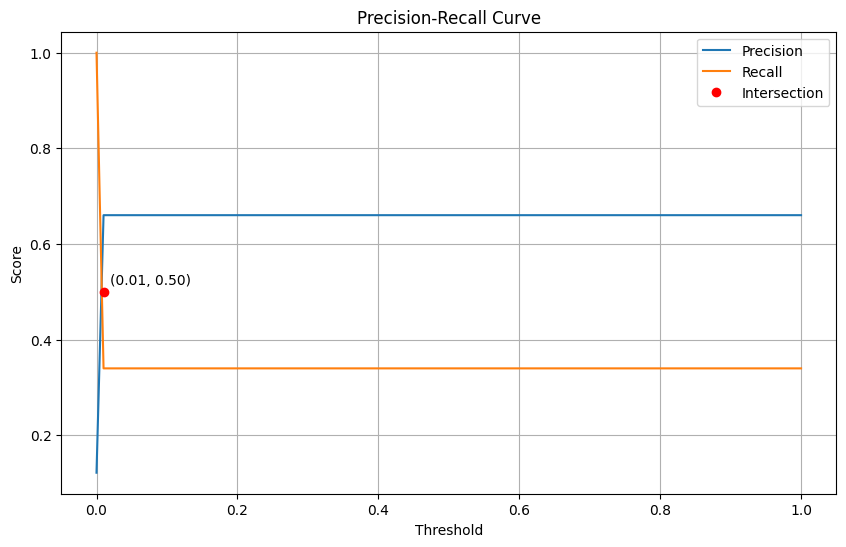

Precision and recall curves intersect at threshold: 0.0100
Intersection value: 0.4999


In [45]:
# Plot precision-recall curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision, label='Precision')
plt.plot(thresholds, recall, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)

# Find intersection point
intersection_idx = np.argmin(np.abs(precision - recall))
intersection_threshold = thresholds[intersection_idx]
intersection_value = (precision[intersection_idx] + recall[intersection_idx]) / 2

plt.plot(intersection_threshold, intersection_value, 'ro', label='Intersection')
plt.annotate(f'({intersection_threshold:.2f}, {intersection_value:.2f})', 
             (intersection_threshold, intersection_value),
             xytext=(5, 5), textcoords='offset points')

plt.legend()
plt.show()

print(f"Precision and recall curves intersect at threshold: {intersection_threshold:.4f}")
print(f"Intersection value: {intersection_value:.4f}")

### Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.02
- 0.22
- 0.42
- 0.62

**Answer: `0.02`**

In [46]:
df_scores['f1_score'] = 2 * ((df_scores.precision * df_scores.recall) / (df_scores.precision + df_scores.recall))
df_scores.head()

,threshold,tp,fp,fn,tn,precision,recall,f1_score
0,0.00,1098,7944,0,0,0.121433,1.000000,0.216568
1,0.01,373,192,725,7752,0.660177,0.339709,0.448587
2,0.02,373,192,725,7752,0.660177,0.339709,0.448587
3,0.03,373,192,725,7752,0.660177,0.339709,0.448587
4,0.04,373,192,725,7752,0.660177,0.339709,0.448587


In [47]:
df_scores.loc[df_scores.f1_score.idxmax()]

threshold       0.010000
tp            373.000000
fp            192.000000
fn            725.000000
tn           7752.000000
precision       0.660177
recall          0.339709
f1_score        0.448587
Name: 1, dtype: float64

### Question 5: 5-Fold CV


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard deviation of the scores across different folds?

- 0.0001
- 0.006
- 0.06
- 0.26

**Answer: `0.006`**

In [48]:
from sklearn.model_selection import KFold

In [49]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [50]:
dv, model = train(df_train, y_train, C=1.0)

In [51]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [52]:
y_pred = predict(df_val, dv, model)

In [53]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [54]:
train_idx, val_idx = next(kfold.split(df_full_train))

In [55]:
len(train_idx), len(val_idx)

(28934, 7234)

In [56]:
len(df_full_train)

36168

In [57]:
df_train = df_full_train.iloc[train_idx]
df_val = df_full_train.iloc[val_idx]

In [58]:
!pip install tqdm

In [59]:
from tqdm.auto import tqdm

/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [60]:
n_splits = 5
C = 1.0

kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
scores = []

for fold, (train_idx, val_idx) in enumerate(kfold.split(df_full_train), 1):
    print(f"Fold {fold}/{n_splits}")
    
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.y.values
    y_val = df_val.y.values

    dv, model = train(df_train, y_train, C=C)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)
    print(f"AUC for fold {fold}: {auc:.3f}")

mean_auc = np.mean(scores)
std_auc = np.std(scores)

print(f"\nResults:")
print(f"C={C}, n_splits={n_splits}")
print(f"Mean AUC: {mean_auc:.3f} +- {std_auc:.3f}")
print(f"Standard deviation of scores: {std_auc:.3f}")

Fold 1/5
AUC for fold 1: 0.899
Fold 2/5
AUC for fold 2: 0.899
Fold 3/5
AUC for fold 3: 0.911
Fold 4/5
AUC for fold 4: 0.908
Fold 5/5
AUC for fold 5: 0.912

Results:
C=1.0, n_splits=5
Mean AUC: 0.906 +- 0.006
Standard deviation of scores: 0.006


### Question 6: Hyperparameter Tuning

Now let's use 5-Fold cross-validation to find the best parameter `C`

* Iterate over the following `C` values: `[0.000001, 0.001, 1]`
* Initialize `KFold` with the same parameters as previously
* Use these parameters for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which `C` leads to the best mean score?

- 0.000001
- 0.001
- 1

If you have ties, select the score with the lowest std. If you still have ties, select the smallest `C`.

**Answer: `1`**

In [61]:
n_splits = 5
C_values = [0.000001, 0.001, 1]

kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

results = {}

for C in C_values:
    print(f"\nEvaluating C={C}")
    scores = []
    
    for fold, (train_idx, val_idx) in enumerate(kfold.split(df_full_train), 1):
        print(f"Fold {fold}/{n_splits}")
        
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
        
        y_train = df_train.y.values
        y_val = df_val.y.values
        
        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
        
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
        print(f"AUC for fold {fold}: {auc:.3f}")
    
    mean_auc = np.mean(scores)
    std_auc = np.std(scores)
    
    results[C] = {
        'mean_auc': round(mean_auc, 3),
        'std_auc': round(std_auc, 3)
    }
    
    print(f"\nResults for C={C}:")
    print(f"Mean AUC: {mean_auc:.3f} +- {std_auc:.3f}")

print("\nOverall Results:")
for C, metrics in results.items():
    print(f"C={C}: Mean AUC = {metrics['mean_auc']:.3f} +- {metrics['std_auc']:.3f}")

best_C = max(results, key=lambda x: results[x]['mean_auc'])
print(f"\nBest C: {best_C}")
print(f"Best Mean AUC: {results[best_C]['mean_auc']:.3f}")


Evaluating C=1e-06
Fold 1/5
AUC for fold 1: 0.685
Fold 2/5
AUC for fold 2: 0.700
Fold 3/5
AUC for fold 3: 0.712
Fold 4/5
AUC for fold 4: 0.709
Fold 5/5
AUC for fold 5: 0.702

Results for C=1e-06:
Mean AUC: 0.701 +- 0.009

Evaluating C=0.001
Fold 1/5
AUC for fold 1: 0.848
Fold 2/5
AUC for fold 2: 0.860
Fold 3/5
AUC for fold 3: 0.864
Fold 4/5
AUC for fold 4: 0.869
Fold 5/5
AUC for fold 5: 0.863

Results for C=0.001:
Mean AUC: 0.861 +- 0.007

Evaluating C=1
Fold 1/5
AUC for fold 1: 0.899
Fold 2/5
AUC for fold 2: 0.899
Fold 3/5
AUC for fold 3: 0.911
Fold 4/5
AUC for fold 4: 0.908
Fold 5/5
AUC for fold 5: 0.912

Results for C=1:
Mean AUC: 0.906 +- 0.006

Overall Results:
C=1e-06: Mean AUC = 0.701 +- 0.009
C=0.001: Mean AUC = 0.861 +- 0.007
C=1: Mean AUC = 0.906 +- 0.006

Best C: 1
Best Mean AUC: 0.906
